In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
%matplotlib inline

In [2]:
boston = load_boston() # Dataset from the sklearn library

In [3]:
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston_df = pd.read_pickle('boston_df.p')

In [5]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
boston_df.shape

(506, 14)

# This dataset has no missing values

we will select a feature to degrade (remove some values as missing data)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(boston_df.iloc[:,:-1],boston_df.iloc[:,-1:], random_state = 1)

In [9]:
map(pd.np.shape,[X_train, X_test, y_train, y_test])

In [10]:
y_train

,y
502,20.6
172,23.1
80,28.0
46,20.0
318,23.1
93,25.0
392,9.7
81,23.9
304,36.1
142,13.4


These testing and training sets form our full dataset, we have prepared some data with missing vaues

# AGE

proportion of owner-occupied units built prior to 1940

In [11]:
boston_dropna_df = pd.read_pickle('boston_dropna_df.p') #read the data into two dataframes

In [12]:
boston_impute_df = boston_dropna_df.copy()

In [13]:
boston_dropna_df['AGE'].isnull().sum()

95

In [14]:
boston_impute_df['AGE'].isnull().sum()

95

### boston_dropna_df will be a dataset to see what would happen if we just dropped rows with missing values - 

In [15]:
boston_dropna_df.dropna(subset=['AGE'],axis=0,inplace=True)

In [16]:
boston_dropna_df['AGE'].isnull().sum()

0

In [17]:
boston_impute_df['AGE'].isnull().sum()

95

Why did I show you that boston_impute_df didn't change when I changed boston_dropna_df?

What would have happened if I created a copy without the `.copy()` method?

```python
boston_impute_df = boston_dropna_df
```

In [18]:
boston_dropna_df.shape

(284, 14)

In [19]:
boston_dropna_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0


# We will compare the performance of this model with the imputed and complete models

Now we need to train a linear regression model and predict the 'AGE' values for the boston_impute_df

Should we include the price in the training data for the imputation?

In [20]:
lm_fitting_df = boston_dropna_df.drop('y',axis=1)
lm_fitting_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
14,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58


Our target now is the 'AGE' column, we will use the boston_dropna_df as the data to fit, we can use data with missing values to train a model

# Using a separate model

In [21]:
lm_for_impute = LinearRegression() #instatiate

In [22]:
lm_for_impute.fit(lm_fitting_df[[x for x in lm_fitting_df.columns if x != 'AGE']],lm_fitting_df['AGE']) #fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
boston_impute_df[boston_impute_df['AGE'].isnull()].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
7,0.14455,12.5,7.87,0.0,0.524,6.172,NaN,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,NaN,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,NaN,6.5921,5.0,311.0,15.2,386.71,17.10,18.9
22,1.23247,0.0,8.14,0.0,0.538,6.142,NaN,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
49,0.21977,0.0,6.91,0.0,0.448,5.602,NaN,6.0877,3.0,233.0,17.9,396.90,16.20,19.4


In [24]:
lm_for_impute.predict(boston_impute_df.drop(['AGE','y'],axis=1)) 
#this uses the other features to predict 'AGE' with the model

array([  55.54169435,   55.07036138,   52.62921279,   44.74737697,
         60.03002858,   70.11902496,   53.45354189,   60.7868362 ,
         56.71243725,   61.59536671,   66.10198784,   62.29115387,
         60.47460428,   68.72231216,   80.16101352,   72.0958641 ,
         79.32670387,   78.48991559,   73.07135463,   71.53859011,
         69.2665315 ,   74.83191928,   71.38293247,   80.76981887,
         89.82952408,   77.57092755,   64.08732792,   65.72801111,
         59.69618849,   62.43967841,   38.2300336 ,   46.30085778,
         48.21844208,   50.07775903,   55.55916465,   70.6686775 ,
         52.32604158,   42.75988831,   38.50707539,   35.35046262,
         36.64148452,   40.35396953,   21.50470684,   16.97045822,
         16.00616149,   39.71182774,   42.23958175,   47.0534663 ,
         39.24097878,   31.26427789,   43.04394218,   39.15922121,
         47.29790301,   48.91127757,   43.95572658,   47.44971127,
         52.45806176,   54.02131554,   60.01513769,   56.95081

In [25]:
boston_impute_df['AGE'][boston_impute_df['AGE'].isnull()] = lm_for_impute.predict(boston_impute_df.drop(['AGE','y'],axis=1))

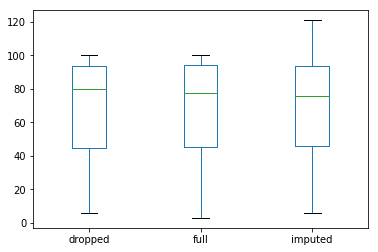

In [26]:
boxplot = pd.DataFrame({'imputed': boston_impute_df['AGE'],'full': boston_df['AGE'],'dropped': boston_dropna_df['AGE']})
boxplot.plot(kind='box')

So these are the imputed values predicted by the lm trained on the data we did have a value for 'AGE' for

# Predicting the price with the full data

\begin{equation}
y_i = \beta_0 + \beta_1 X_i + \epsilon_i
\end{equation}


In [27]:
X_train, X_test, y_train, y_test = train_test_split(boston_df.iloc[:,:-1],boston_df.iloc[:,-1:],random_state=111)

In [28]:
map(pd.np.shape,[X_train, X_test, y_train, y_test])

In [29]:
lm_full = LinearRegression()

In [30]:
lm_full.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print ('r-squared for this model = ',lm_full.score(X_test,y_test))

r-squared for this model =  0.759282782976


# The dropped data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(boston_dropna_df.iloc[:,:-1],boston_dropna_df.iloc[:,-1:],random_state=111)

In [33]:
lm_dropped = LinearRegression()
lm_dropped.fit(X_train,y_train)

print ('r-squared for this model = ',lm_dropped.score(X_test,y_test))

r-squared for this model =  0.621927059681


# The imputed data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(boston_impute_df.iloc[:,:-1],boston_impute_df.iloc[:,-1:],random_state=111)

In [35]:

lm_impute = LinearRegression()
lm_impute.fit(X_train,y_train)

print ('r-squared for this model = ',lm_impute.score(X_test,y_test))

r-squared for this model =  0.73370999822


from [adventures-in-statistics](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit)

What Is R-squared?

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.